# Model Evaluation

This notebook is to evaluate the model trained for VQA.

In [1]:
%matplotlib inline
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Get Dataloader

In [2]:
from data_loader import get_loader

# dataloader params
# input_dir = '../../data/vqa/inputs64'
input_dir = '../../data/vqa/inputs224'
max_qst_length = 30
max_num_ans = 10
batch_size = 4
num_workers = 0
train_portion = 0.01

data_loader = get_loader(
    input_dir=input_dir,
    input_vqa_train='train.npy',
    input_vqa_valid='valid.npy',
    max_qst_length=max_qst_length,
    max_num_ans=max_num_ans,
    batch_size=batch_size,
    num_workers=num_workers,
    train_portion=train_portion)

train_loader = data_loader['train']
train_dataset = train_loader.dataset.dataset
print(f'data_loader train len: {len(train_loader)}')
print(f'qst_vocab_size: {train_dataset.qst_vocab.vocab_size}')


data_loader train len: 1110
qst_vocab_size: 17858


### Get Model

In [7]:
import config
from models_lct import VqaModel as LctVqaModel

config.ARCH_TYPE = 'fixed'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# model params
embed_size = 512
qst_vocab_size = train_dataset.qst_vocab.vocab_size
ans_vocab_size = 1000
word_embed_size = 300
num_layers = 1
hidden_size = 512

def get_model(exp_path):
    model = LctVqaModel(
        embed_size=embed_size,
        qst_vocab_size=qst_vocab_size,
        ans_vocab_size=ans_vocab_size,
        word_embed_size=word_embed_size,
        num_layers=num_layers,
        hidden_size=hidden_size
    )
    model.to( DEVICE )
    model_name = 'ef_model.pt'
    model_path = os.path.join(exp_path, model_name)
    state_dict = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict( state_dict['ef_model'] )
    
    # freeze params
    for param in model.parameters():
        param.requires_grad = False
    model.eval()
    return model

exp_dir = './experiment_data'
# exp_name = 'qst_eval'
exp_name = 'qst_eval_224'
exp_path = os.path.join(exp_dir, exp_name)
model = get_model(exp_path)
print('model type:', type(model))

model type: <class 'models_lct.VqaModel'>


### Evaluate Model - Plots

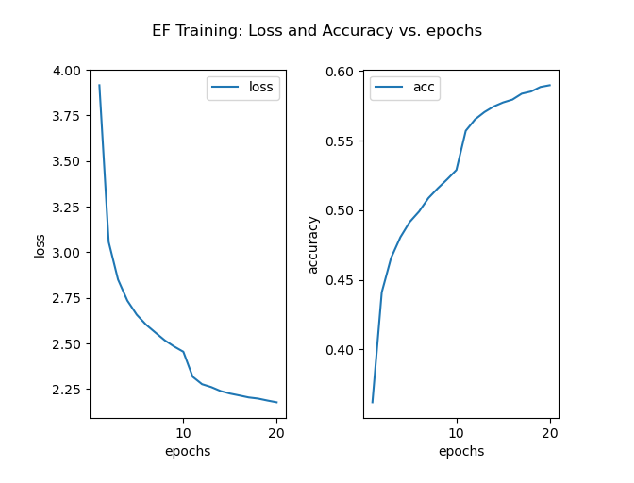

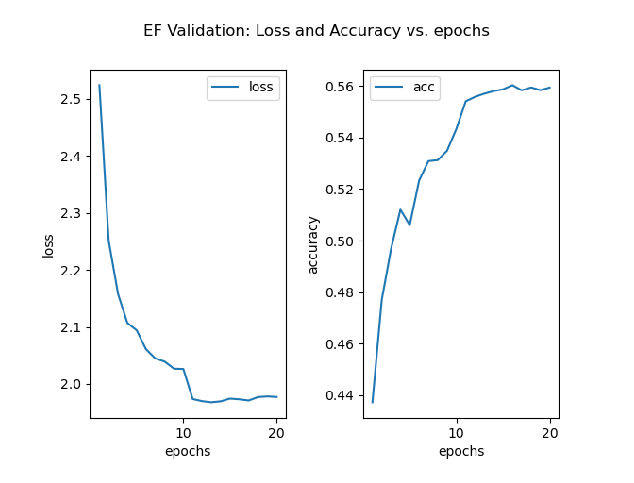

In [8]:
plt.rcParams['figure.dpi'] = 150
train_plot_path = os.path.join( exp_path, 'ef_train_loss_acc.png' )
val_plot_path = os.path.join( exp_path, 'ef_val_loss_acc.png' )

plt.axis('off')
train_img = mpimg.imread(train_plot_path)
plt.imshow(train_img)
plt.show()

plt.axis('off')
val_img = mpimg.imread(val_plot_path)
plt.imshow(val_img)
plt.show()

### Evaluate Model - Questions ( Deterministic Sampling )

qst_encoder deterministic: True temperature: 0.1
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000306049.jpg


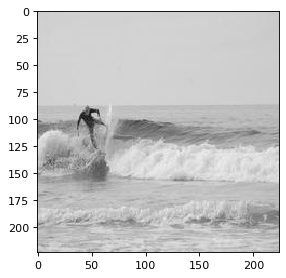

ground truth qst: is the surfer still on top of the surfboard ? ans: yes
generated qst: what is the man doing ? ans: surfing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524905.jpg


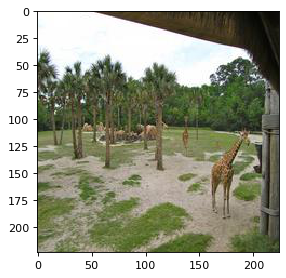

ground truth qst: what is the smell ? ans: giraffe
generated qst: what is the giraffe ' s face ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001122.jpg


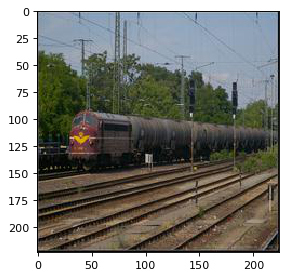

ground truth qst: is this the back of the train ? ans: no
generated qst: what color is the train ? ans: black


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000043773.jpg


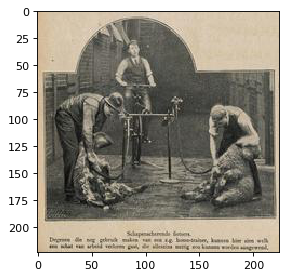

ground truth qst: what is powering the contraption in this photograph ? ans: bicycle
generated qst: what is the man doing ? ans: standing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132170.jpg


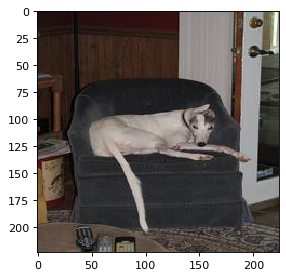

ground truth qst: what kind of animal is sleeping on the chair ? ans: dog
generated qst: what is the cat laying on ? ans: bed


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262508.jpg


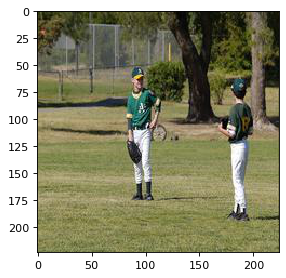

ground truth qst: what sport are the kids playing ? ans: baseball
generated qst: what is the man in the background doing ? ans: standing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394021.jpg


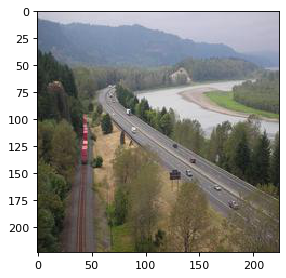

ground truth qst: is the freeway crowded ? ans: no
generated qst: is this a train station from the river ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131279.jpg


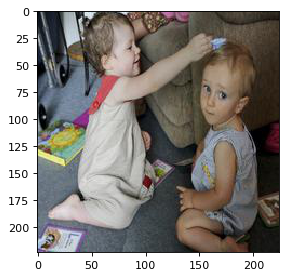

ground truth qst: are they twins ? ans: no
generated qst: what is the baby holding ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000427745.jpg


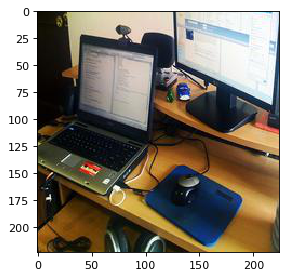

ground truth qst: how many mac computers in this picture ? ans: 1
generated qst: what is the name of the book ? ans: 0


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000546151.jpg


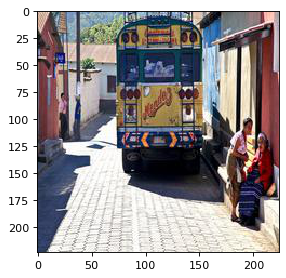

ground truth qst: how many people are standing in this image ? ans: 3
generated qst: what color is the train ? ans: yellow


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132123.jpg


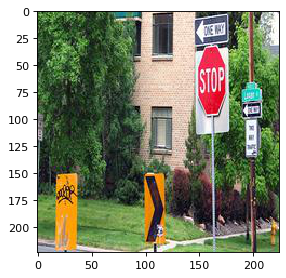

ground truth qst: what does the red sign say ? ans: stop
generated qst: what is the name of the street sign ? ans: stop


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000327820.jpg


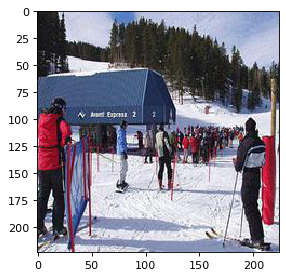

ground truth qst: what number is on the shed ? ans: 2
generated qst: what color is the man ' s hat ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000754.jpg


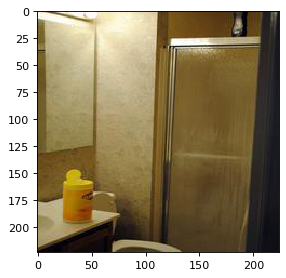

ground truth qst: is anyone sitting on the toilet ? ans: no
generated qst: is there a shower curtain in the bathroom ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


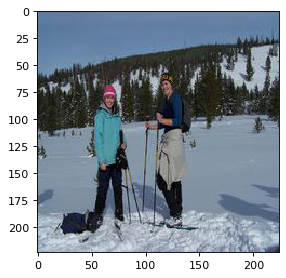

ground truth qst: are both these skiers adults ? ans: no
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000312.jpg


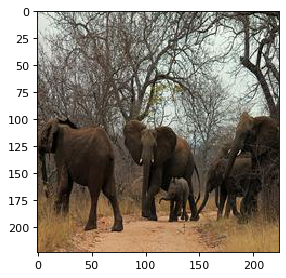

ground truth qst: how many baby elephants are there ? ans: 3
generated qst: how many elephants are in the picture ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262554.jpg


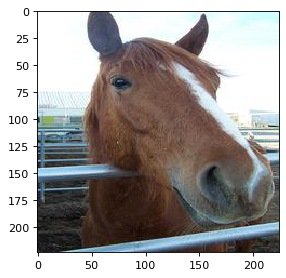

ground truth qst: what is the color of the horse ? ans: brown
generated qst: what is the cow eating ? ans: grass


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000902.jpg


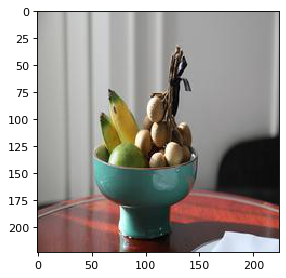

ground truth qst: are there grapes in the bowl ? ans: no
generated qst: what is the fruit in the bowl ? ans: banana


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524965.jpg


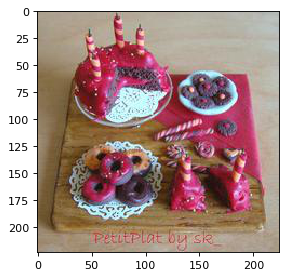

ground truth qst: where are the cakes ? ans: cutting board
generated qst: what is the fruit in the bowl ? ans: cake


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000135332.jpg


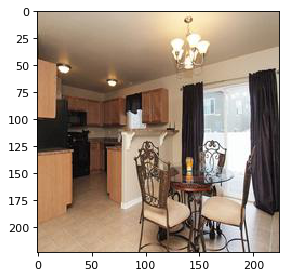

ground truth qst: how many chairs are there ? ans: 4
generated qst: what color is the wall ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000568177.jpg


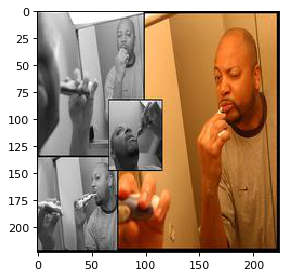

ground truth qst: what kind of electronic is he using ? ans: toothbrush
generated qst: what is the man doing ? ans: brushing teeth


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263002.jpg


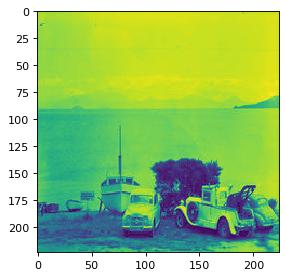

ground truth qst: how many people is in the truck ? ans: 0
generated qst: what color is the sky ? ans: blue


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131742.jpg


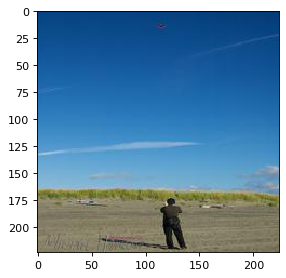

ground truth qst: what kind of cloud is in the sky ? ans: white
generated qst: what is the man in the background doing ? ans: standing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132170.jpg


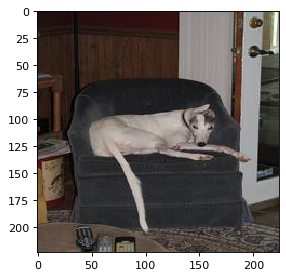

ground truth qst: what kind of dog is that ? ans: <unk>
generated qst: what is the cat laying on ? ans: bed


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393223.jpg


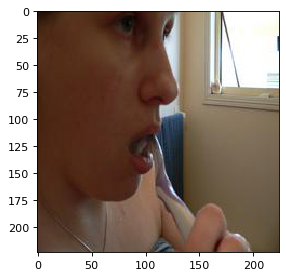

ground truth qst: what is the child doing ? ans: brushing teeth
generated qst: what is the baby eating ? ans: toothbrush


In [11]:
plt.rcParams['figure.dpi'] = 80
qst_vocab = train_dataset.qst_vocab
ans_vocab = train_dataset.ans_vocab
unk_idx = ans_vocab.unk2idx

qst_encoder = model.qst_encoder
qst_encoder.deterministic = True
qst_encoder.temperature = 0.1
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')

def evaluate_qst(model, data_loader, N=24):
    print( 'Evaluating question answer pairs' )
    num_eval = 0
    for batch_idx, batch_sample in enumerate(data_loader):
        if num_eval >= N:
            break
        # print(f'batch_idx: {batch_idx}')
        image = batch_sample['image'].to(DEVICE)
        question = batch_sample['question']
        answer = batch_sample['answer_label']
        image_path = batch_sample['image_path']
        
        # ground truth question and answers
        qst = [ qst_vocab.arr2qst( q ) for q in question ]
        ans = [ ans_vocab.idx2word( a ) for a in answer ]
        
        # generated question-answer
        gen_question, gen_answer = model.generate( image )
        gen_answer[:, unk_idx] = -9999.
        gen_answer = torch.argmax( gen_answer, 1 )
        gen_qst = [ qst_vocab.arr2qst( q ) for q in gen_question ]
        gen_ans = [ ans_vocab.idx2word( a ) for a in gen_answer ]
        
        n = len( image )
        for i in range( n ):
            print( f'\n\nimage path:{image_path[i]}' )
            img = mpimg.imread(image_path[i])
            imgplot = plt.imshow(img)
            plt.show()
            print( f'ground truth qst: {qst[i]} ans: {ans[i]}' )
            print( f'generated qst: {gen_qst[i]} ans: {gen_ans[i]}' )
        num_eval += n
    
evaluate_qst(model, train_loader)

### Evaluate Model - Questions ( Stochastic Sampling )

qst_encoder deterministic: False temperature: 0.6
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000263002.jpg


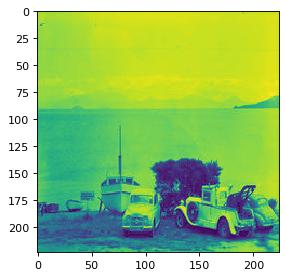

ground truth qst: is this a family picture taken long ago ? ans: no
generated qst: what color is the plane ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


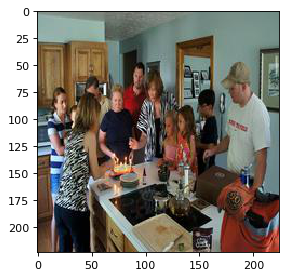

ground truth qst: how many people have ponytails ? ans: 1
generated qst: how many people are wearing hats ? ans: 0


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394234.jpg


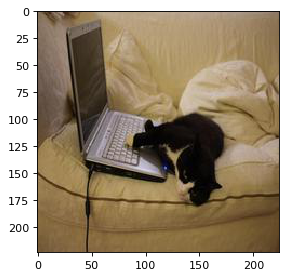

ground truth qst: what are the cats doing ? ans: resting
generated qst: what is the cat ' s head on ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000309.jpg


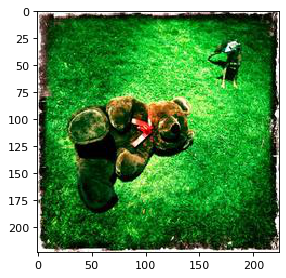

ground truth qst: what animal is shown ? ans: bear
generated qst: what are the people doing with the bears ? ans: waiting


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000080585.jpg


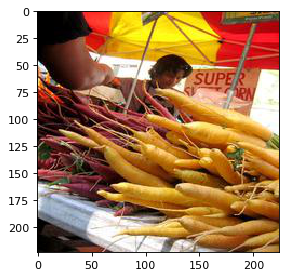

ground truth qst: is it a sunny day ? ans: yes
generated qst: what color are the bananas ' s stripes ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524651.jpg


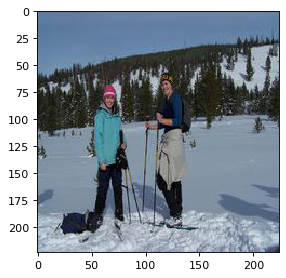

ground truth qst: who is with the man ? ans: woman
generated qst: is this person wearing a hat ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262710.jpg


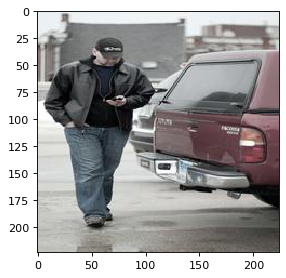

ground truth qst: what kind of truck is beside the man ? ans: toyota
generated qst: is this a professional driver ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524877.jpg


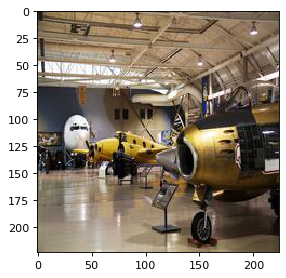

ground truth qst: is this a museum ? ans: yes
generated qst: what is the color of the plane ? ans: yellow


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000284098.jpg


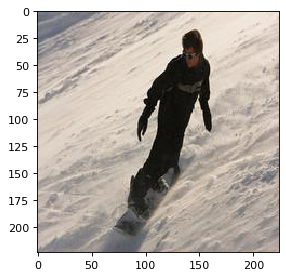

ground truth qst: what is the man doing ? ans: snowboarding
generated qst: what color is the man ' s shirt ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131674.jpg


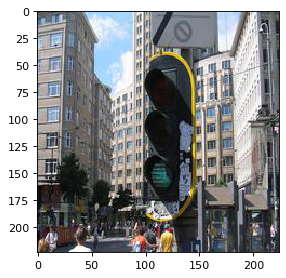

ground truth qst: how many trees are in the picture ? ans: 3
generated qst: what color is the sign ? ans: yellow


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262688.jpg


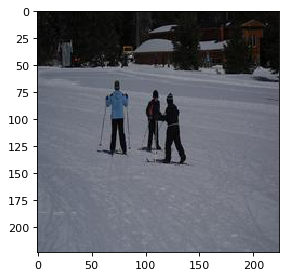

ground truth qst: how many people in this image have red on their jackets ? ans: 0
generated qst: what color is the woman ' s shirt ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524679.jpg


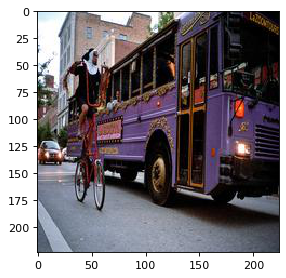

ground truth qst: what is the woman holding ? ans: bike
generated qst: what color is the bus ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000342184.jpg


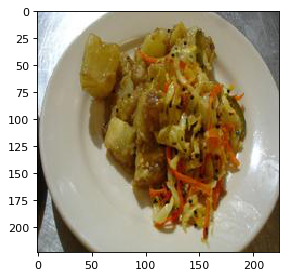

ground truth qst: is this an international dish ? ans: yes
generated qst: what color is the pot ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000397186.jpg


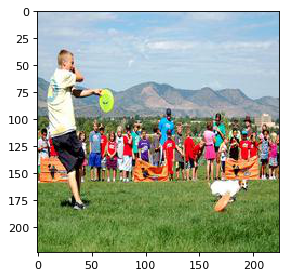

ground truth qst: what color is the frisbee ? ans: yellow
generated qst: what sport are they playing ? ans: frisbee


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


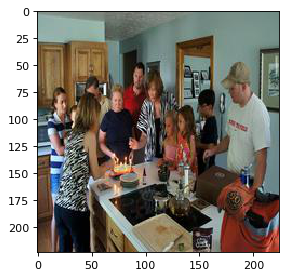

ground truth qst: how many men do you see with button down shirts ? ans: 2
generated qst: what is the man holding over his shoulder ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393592.jpg


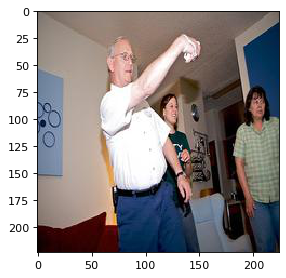

ground truth qst: what color is the shirt of the woman closest to the front of the picture ? ans: white
generated qst: what is the woman holding in her right hand ? ans: wii controller


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131366.jpg


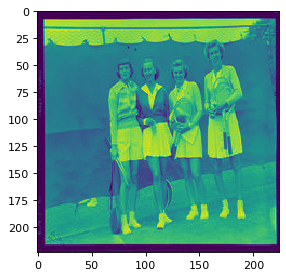

ground truth qst: how many girls are in the picture ? ans: 4
generated qst: what color is the man ' s helmet ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525501.jpg


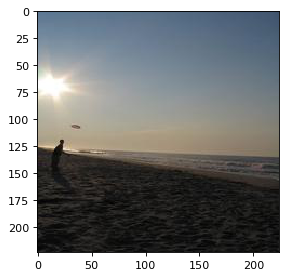

ground truth qst: which side of the picture is the light source coming from ? ans: left
generated qst: are there any people on the beach ? ans: no


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262477.jpg


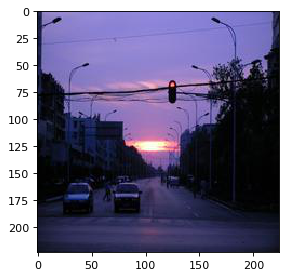

ground truth qst: is the traffic signal red ? ans: yes
generated qst: what color is the traffic light ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131312.jpg


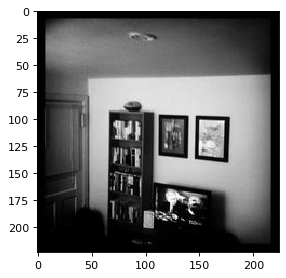

ground truth qst: what objects are directly above the tv set ? ans: pictures
generated qst: what is the floor made out of ? ans: wood


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262770.jpg


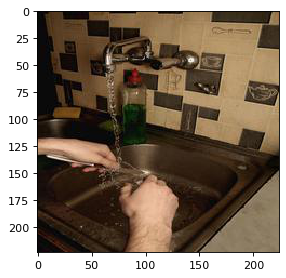

ground truth qst: what is coming out of the faucet on the wall ? ans: water
generated qst: what is the man in the blue shirt holding ? ans: nothing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000153031.jpg


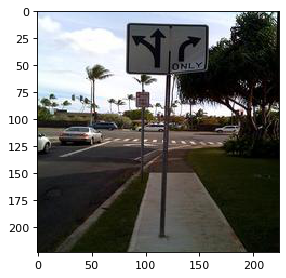

ground truth qst: which three directions are allowed at this intersection ? ans: <unk>
generated qst: what number is on the traffic signal signal ? ans: 20


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131118.jpg


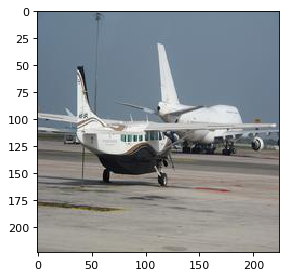

ground truth qst: are these airliners ? ans: yes
generated qst: is this a passenger aircraft ? ans: 1


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393442.jpg


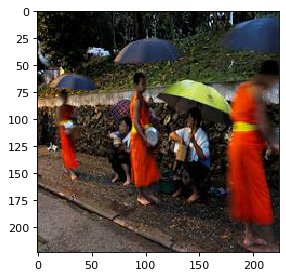

ground truth qst: are the umbrellas wet ? ans: yes
generated qst: what is the man doing ? ans: walking


In [12]:
qst_encoder = model.qst_encoder
qst_encoder.deterministic = False
qst_encoder.temperature = 0.6
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')
evaluate_qst(model, train_loader, N=24)